# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from math import sqrt

## Загрузка и подготовка данных

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')

In [3]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

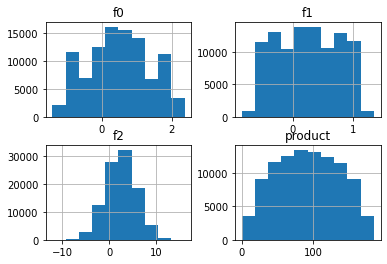

In [4]:
geo_data_0.hist()

In [5]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
#среднее значение по добыче 91.84
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [7]:
#дропнем столбец с ИД, в исследовании не понадобится
data_0 = geo_data_0.drop(['id'], axis=1)

In [8]:
features_0 = data_0.drop(['product'], axis=1)
target_0 = data_0['product']

In [9]:
features_train_0, features_valid_0, target_train_0, target_valid_0  = train_test_split(features_0, target_0, 
                                                                            test_size = 0.25, random_state=12345)

In [10]:
#проверим размер выборки
print('\n','Размер датасета',data_0.shape,
      '\n', 'Признаки тренеровочной выборки',features_train_0.shape,
      '\n','Таргет тренировочной выборки', target_train_0.shape,
      '\n','Признаки валид. выборки', features_valid_0.shape,
      '\n','Таргет валид. выборки', target_valid_0.shape)


 Размер датасета (100000, 4) 
 Признаки тренеровочной выборки (75000, 3) 
 Таргет тренировочной выборки (75000,) 
 Признаки валид. выборки (25000, 3) 
 Таргет валид. выборки (25000,)


<b>geo_data_1

In [11]:
#далее я потвторяю все тоже самое для оставшихся датасетов

In [12]:
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')

In [13]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

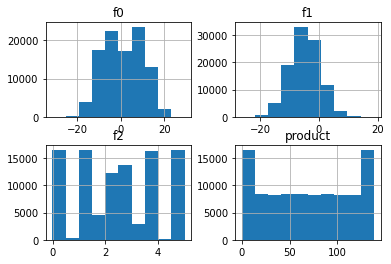

In [14]:
geo_data_1.hist()

In [15]:
#средее значение по добыче 57.08
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [16]:
data_1 = geo_data_1.drop(['id'], axis=1)

In [17]:
features_1 = data_1.drop(['product'], axis=1)
target_1 = data_1['product']

In [18]:
features_train_1, features_valid_1, target_train_1, target_valid_1  = train_test_split(features_1, target_1, 
                                                                            test_size = 0.25, random_state=12345)

In [19]:
print('\n','Размер датасета',data_1.shape,
      '\n', 'Признаки тренеровочной выборки',features_train_1.shape,
      '\n','Таргет тренировочной выборки', target_train_1.shape,
      '\n', 'Признаки валид. выборки', features_valid_1.shape,
      '\n','Таргет валид. выборки',  target_valid_1.shape)


 Размер датасета (100000, 4) 
 Признаки тренеровочной выборки (75000, 3) 
 Таргет тренировочной выборки (75000,) 
 Признаки валид. выборки (25000, 3) 
 Таргет валид. выборки (25000,)


<b>geo_data_2

In [20]:
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [21]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

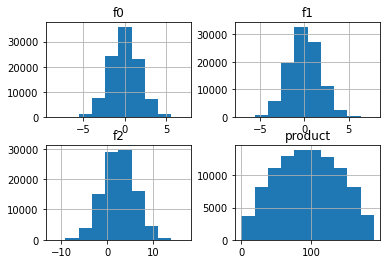

In [22]:
geo_data_2.hist()

In [23]:
#среднее значение по добыче 94.92
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [24]:
data_2 = geo_data_2.drop(['id'], axis=1)

In [25]:
features_2 = data_2.drop(['product'], axis=1)
target_2 = data_2['product']

In [26]:
features_train_2, features_valid_2, target_train_2, target_valid_2  = train_test_split(features_2, target_2, 
                                                                            test_size = 0.25, random_state=12345)

In [27]:
print('\n','Размер датасета',data_2.shape,
      '\n', 'Признаки тренеровочной выборки',features_train_2.shape,
      '\n','Таргет тренировочной выборки', target_train_2.shape,
      '\n', 'Признаки валид. выборки', features_valid_2.shape,
      '\n','Таргет валид. выборки',  target_valid_2.shape)


 Размер датасета (100000, 4) 
 Признаки тренеровочной выборки (75000, 3) 
 Таргет тренировочной выборки (75000,) 
 Признаки валид. выборки (25000, 3) 
 Таргет валид. выборки (25000,)


## Обучение и проверка модели

<b>region_0

In [28]:
#так как мы используем линейную регрессию в данном исследовании, то я
#пропустила этап подбора параметров, т.к. в ЛР мало параметров для подбора.

model = LinearRegression()
model.fit(features_train_0, target_train_0)
predicted_valid_0 = model.predict(features_valid_0)

#создала отдельный массив данных по предикту и таргету для дальнейших расчетов.
predictions_0 = pd.Series(predicted_valid_0)
target_valid_0.reset_index(drop=True, inplace=True)

print("RMSE: ", sqrt(mean_squared_error(target_valid_0, predictions_0)))
print("Средний запас предсказанного сырья: ", predictions_0.mean())
print(predictions_0.shape, target_valid_0.shape)

RMSE:  37.5794217150813
Средний запас предсказанного сырья:  92.59256778438035
(25000,) (25000,)


<b>region_1

In [29]:
model = LinearRegression()
model.fit(features_train_1, target_train_1)
predicted_valid_1 = model.predict(features_valid_1)


#создала отдельный массив данных по предикту и таргету для дальнейших расчетов.
predictions_1 = pd.Series(predicted_valid_1)
target_valid_1.reset_index(drop=True, inplace=True)

print("RMSE: ", sqrt(mean_squared_error(target_valid_1, predictions_1)))
print("Средний запас предсказанного сырья: ", predictions_1.mean())
print(predictions_1.shape, target_valid_2.shape)

RMSE:  0.893099286775617
Средний запас предсказанного сырья:  68.728546895446
(25000,) (25000,)


In [30]:
#Хорошие метрики для региона_1

<b>region_2

In [31]:
model = LinearRegression()
model.fit(features_train_2, target_train_2)
predicted_valid_2 = model.predict(features_valid_2)


#создала отдельный массив данных по предикту и таргету для дальнейших расчетов.
predictions_2 = pd.Series(predicted_valid_2)
target_valid_2.reset_index(drop=True, inplace=True)

print("RMSE: ", sqrt(mean_squared_error(target_valid_2, predictions_2)))
print("Средний запас предсказанного сырья: ", predictions_2.mean())
print(predictions_2.shape, target_valid_2.shape)

RMSE:  40.02970873393434
Средний запас предсказанного сырья:  94.96504596800489
(25000,) (25000,)


<b>Вывод</b>

Модель лучше всего предсказывает по данным в Регионе 1, но средние показатели по добыче там намного ниже, чем в других регионах.

## Подготовка к расчёту прибыли

In [32]:
#Все ключевые значения для расчётов
budget =  10*(10**9)
income_per_bar = 450000
points = 200

In [33]:
#достаточный объём сырья для безубыточной разработки новой скважины
volume_for_revenue = (budget/income_per_bar)/points
round(volume_for_revenue)

111

In [34]:
#сравним полученный объём сырья со средним запасом в каждом регионе
print("Регион 0", "\n",
    data_0['product'].describe(), 
      "\n", "Регион 1", "\n",
      data_1['product'].describe(), 
      "\n", "Регион 2", "\n",
      data_2['product'].describe())

Регион 0 
 count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64 
 Регион 1 
 count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64 
 Регион 2 
 count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64


## Расчёт прибыли и рисков 

In [35]:
#Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

def income(target, pred):
    #print(target, pred)
    sort_predict = pd.Series(pred).sort_values(ascending=False).head(200)
    sort_target = (target.reset_index(drop = True)[sort_predict.index])
    #print(sort_predict, sort_target)
    return sort_target.sum() * income_per_bar - budget

In [36]:
print("Прибыль в регионе 0:",income(target_valid_0, predictions_0))

Прибыль в регионе 0: 3320826043.1398506


In [37]:
print("Прибыль в регионе 1:",income(target_valid_1,predictions_1))

Прибыль в регионе 1: 2415086696.681511


In [38]:
print("Прибыль в регионе 2:",income(target_valid_2,predictions_2))

Прибыль в регионе 2: 2710349963.5998325


In [39]:
#Посчитали риски и прибыль для каждого региона:

def risk_and_profit(target, pred):
    state = np.random.RandomState(12345)
    values = []
    predicitons = pd.Series(pred)
    for i in range(1000):
        pred_subsumple = pred.sample(n=500, replace=True, random_state=state)
        values.append(income(target, pred_subsumple))


    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    
    print("Средняя прибыль:", values.mean())
    print("Риски потерь:", (values < 0).mean())
    print("95% интервал от", lower, "до", upper)

In [40]:
print(risk_and_profit(target_valid_0,predictions_0))

Средняя прибыль: 396164984.8023711
Риски потерь: 0.069
95% интервал от -111215545.89049526 до 909766941.5534226
None


In [41]:
print(risk_and_profit(target_valid_1, predictions_1))

Средняя прибыль: 456045105.7866608
Риски потерь: 0.015
95% интервал от 33820509.39898363 до 852289453.866036
None


In [42]:
print(risk_and_profit(target_valid_2,predictions_2))

Средняя прибыль: 404403866.5683568
Риски потерь: 0.076
95% интервал от -163350413.39560106 до 950359574.9237995
None


<b>Из полученных данных, предположим, что лучше всего подойтет регион 1:
Нету риска потерь, высокая средняя прибыль. Приемлимый 95% интервал.</b>